In [2]:
#Data Preprocessing
#Data downloaded from 
#https://www.airkorea.or.kr/web/last_amb_hour_data?pMENU_NO=123

In [3]:
f = open("./2018_2019_2020.csv", 'r')
f = f.read()
f = f.split("\n")

In [4]:
print(len(f))

11947304


In [5]:
print(f[0],"\n",f[1])

﻿지역,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소 
 서울 중구,111121,중구,2018010101,0.004,0.5,0.02,0.02,34,19,서울 중구 덕수궁길 15


In [6]:
print(f[1].split(","))

['서울 중구', '111121', '중구', '2018010101', '0.004', '0.5', '0.02', '0.02', '34', '19', '서울 중구 덕수궁길 15']


In [7]:
# let's collect pm2.5 (초미세먼지(㎍/㎥)) at 중구
junggu  = []
count = 0
for i in range(1, len(f)):
    line = f[i]
    try:
        if line.split(",")[-1] == '서울 중구 덕수궁길 15':
            try:
                pm_val = float(line.split(",")[-2])
                junggu.append(pm_val)
            except:
                # when there is no data copy from previous data point
                junggu.append(junggu[-1])
                count = count + 1
                pass
    except:
        pass

In [8]:
print(count, len(junggu))

248 24096


In [9]:
print(junggu[0:2])

[19.0, 14.0]


In [10]:
#normalization
pm25_min = min(junggu)
pm25_max = max(junggu)
for i in range(len(junggu)):
    junggu[i]=(junggu[i]-pm25_min)/(pm25_max - pm25_min)

In [12]:
print(pm25_min, pm25_max, junggu[0:2])

1.0 149.0 [0.12162162162162163, 0.08783783783783784]


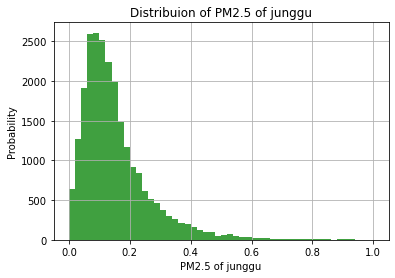

In [13]:
#let's lookat the distribution of pm2.5 of junggu!
import matplotlib.pyplot as plt
#the histogram of the data
n, bins, patches = plt.hist(junggu, 50,facecolor='g', alpha=0.75)
plt.xlabel('PM2.5 of junggu')
plt.ylabel('Probability')
plt.title('Distribuion of PM2.5 of junggu')
plt.grid(True)
plt.show()

In [14]:
# We will predict concentration of pm2.5 based on pm2.5 of previous 24 hours of historical data.
print(junggu[0:24], junggu[24])

[0.12162162162162163, 0.08783783783783784, 0.08783783783783784, 0.0945945945945946, 0.10135135135135136, 0.10810810810810811, 0.10135135135135136, 0.08783783783783784, 0.08783783783783784, 0.07432432432432433, 0.10135135135135136, 0.10810810810810811, 0.08108108108108109, 0.10810810810810811, 0.14864864864864866, 0.13513513513513514, 0.13513513513513514, 0.12162162162162163, 0.14189189189189189, 0.13513513513513514, 0.13513513513513514, 0.12837837837837837, 0.14864864864864866, 0.14189189189189189] 0.1554054054054054


In [15]:
#let's create input(x) and output(y)

In [16]:
x =[]; y =[]
for i in range(24, len(junggu)):
    x.append(junggu[i-24: i])
    y.append([junggu[i]])

In [17]:
len(x), len(y)

(24072, 24072)

In [18]:
#shuffle data
idx = [i for i in range(len(x))] 

In [19]:
import random

In [20]:
random.shuffle(idx)

In [21]:
x_shuffle=[]
y_shuffle=[]
for i in idx:
    x_shuffle.append(x[i])
    y_shuffle.append(y[i])
x,y = x_shuffle, y_shuffle

In [22]:
#change input and output as numpy array
import numpy as np
x = np.asarray(x) 
y = np.asarray(y)

In [23]:
print(np.shape(x), np.shape(y))

(24072, 24) (24072, 1)


In [24]:
# training set: 80% test set: 20%
x_train, y_train = x[0:int(len(x)*0.8)], y[0:int(len(x)*0.8)]
x_test, y_test = x[int(len(x)*0.8):len(x)], y[int(len(x)*0.8): len(x)]

In [25]:
print(np.shape(x_train), np.shape(y_train), np.shape(x_test), np.shape(y_test))

(19257, 24) (19257, 1) (4815, 24) (4815, 1)


(array([111., 269., 380., 471., 548., 508., 468., 419., 275., 254., 193.,
        152., 116.,  96.,  79.,  78.,  60.,  57.,  42.,  32.,  33.,  21.,
         24.,  18.,   9.,  19.,  16.,   5.,   8.,  10.,   6.,   3.,   8.,
          3.,   7.,   2.,   0.,   3.,   0.,   3.,   1.,   3.,   0.,   0.,
          3.,   1.,   0.,   0.,   0.,   1.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <BarContainer object of 50 artists>)

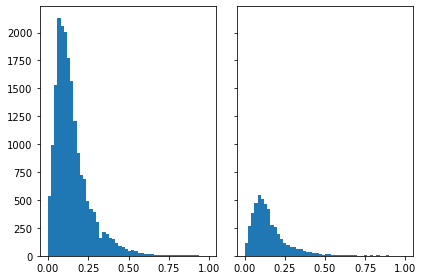

In [26]:
#Let's look at the distribution of y_train and y_test
train = np.reshape(y_train, [len(y_train)])
test = np.reshape(y_test, [len(y_test)])
n_bins = 50
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
# We can set the number of bins with the `bins` kwarg
axs[0].hist(train, bins=n_bins)
axs[1].hist(test, bins=n_bins)

In [27]:
# Save it as npy files
np.save("train_x.npy", x_train)
np.save("train_y.npy", y_train)
np.save("test_x.npy", x_test)
np.save("test_y.npy", y_test)